<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1. Import Necessary Libraries

In [606]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset (concrete.csv) and read it into DataFrame:

In [514]:
data = pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Performing Basic EDA

Find the shape of the data,data type of individual columns

Check the presence of missing values

Descriptive stats of numerical columns

Find the distribution of numerical columns and the asssociated skeweness and presence of outliers

Distribution of categorical columns


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Shape of data :

In [515]:
data.shape

(1030, 9)

<h3><b>We see that there are 1030 rows and 9 columns in data.</b><h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Summarised Information about the data and the datatypes of each respective attributes.

In [516]:
data.info() #Shows datatypes of each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.5 Check the dataset for any missing values


In [517]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [518]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<h3><b>We see that there are no missing or null values in data.</b> </h3>

<h3><b> Now, we will see Summarised Data : </b> </h3>

In [519]:
data.describe() #Shows brief summary of data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<h3><b>Now that we have seen various statistics and measures of the various attributes, and got a fair idea about the data, lets see the distribution of data through visualization. This will visually display the spread and distribution of data, also highlighting the outliers. </b></h3>

<h3><b>This visual representation will not only take into account the five point summary while displaying , but also give a clearer repesentation of spread and also detect outliers</b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.6 Univarite Analysis using Distribution of Attributes :

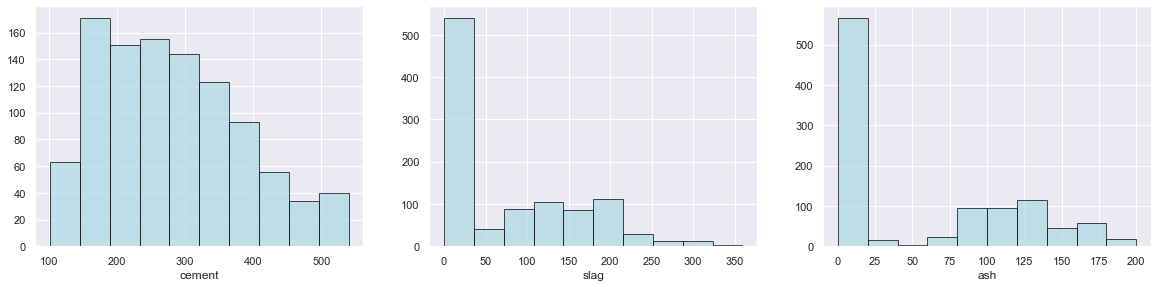

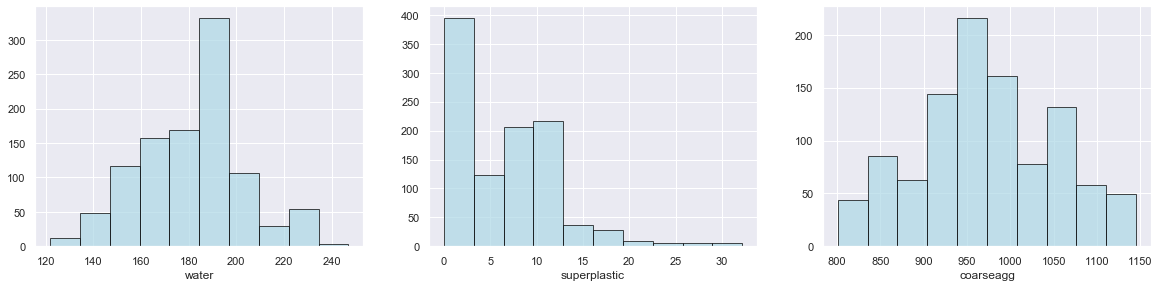

In [520]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["cement"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('cement')

plt.subplot(3,3,2)
plt.hist(data["slag"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('slag')

plt.subplot(3,3,3)
plt.hist(data["ash"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('ash')

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["water"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('water')

plt.subplot(3,3,2)
plt.hist(data["superplastic"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('superplastic')


plt.subplot(3,3,3)
plt.hist(data["coarseagg"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('coarseagg')




plt.show()

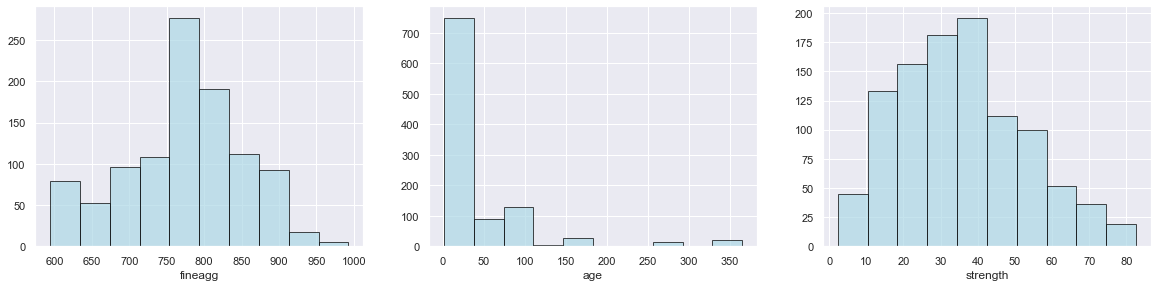

In [521]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["fineagg"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('fineagg')

plt.subplot(3,3,2)
plt.hist(data["age"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data["strength"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('strength')


plt.show()

<h3><b> Alternatively, we can visualize distribution of attributes using distplot as follows : </b></h3>

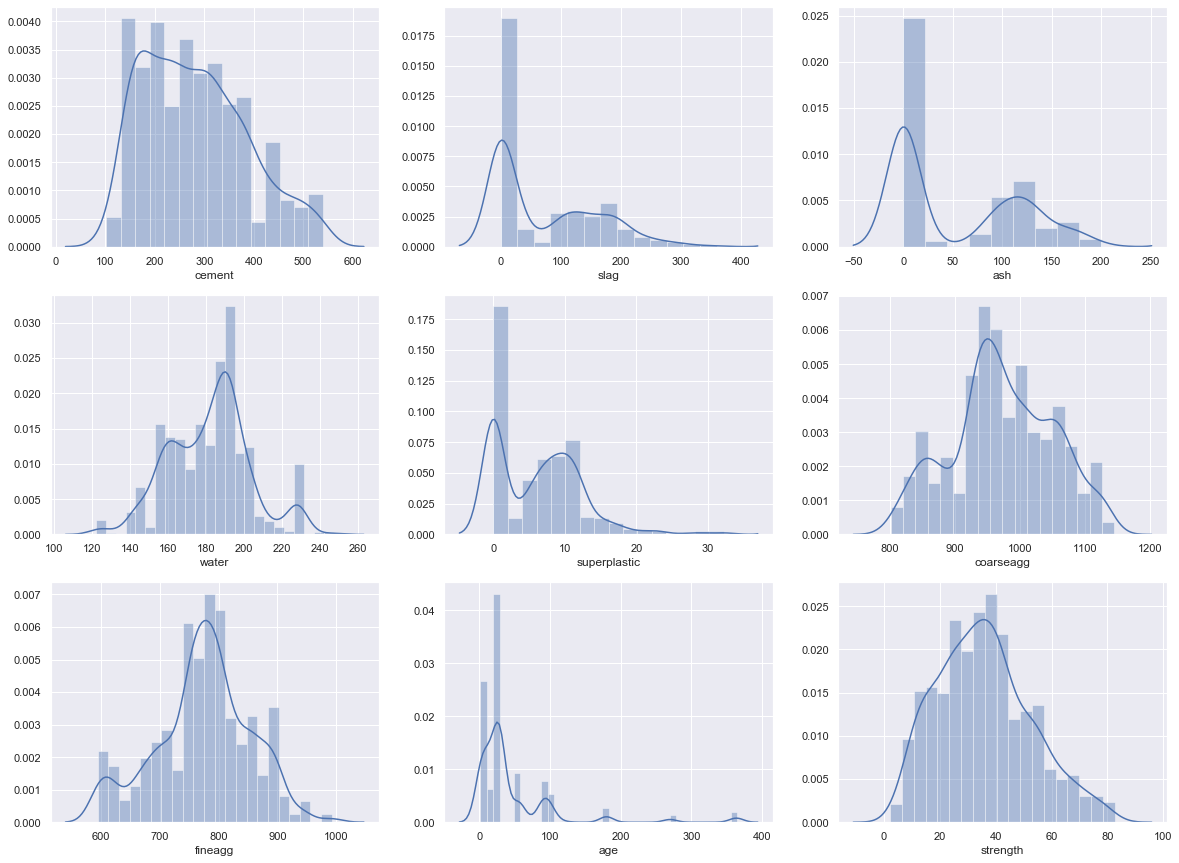

In [522]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
for i, column in enumerate(data.columns):
    sns.distplot(data[column],ax=axes[i//3,i%3])

<h3><b>We see that data values of majority of attributes are highly skewed.</b></h3>

<h3><b>We also see that distribution is not normal for majority of attributes, also <i><u>Slag, Ash, Superplastic, Age</u></i> has more spread and so more outliers. </b></h3>

<h3><b>The spread of majority of the attributes is large and also shows high degree of skewness. </b></h3>

<h3><b>Let's understand it more visually by visualizing its outliers and skewness values. </b></h3>

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.


If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.


### We can see skewness of all the attributes as follows :

In [523]:
data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

<h3><b>We see that most of the attributes are highly skewed, let's see the boxplot of some of them to visualize outliers as well.</b></h3>

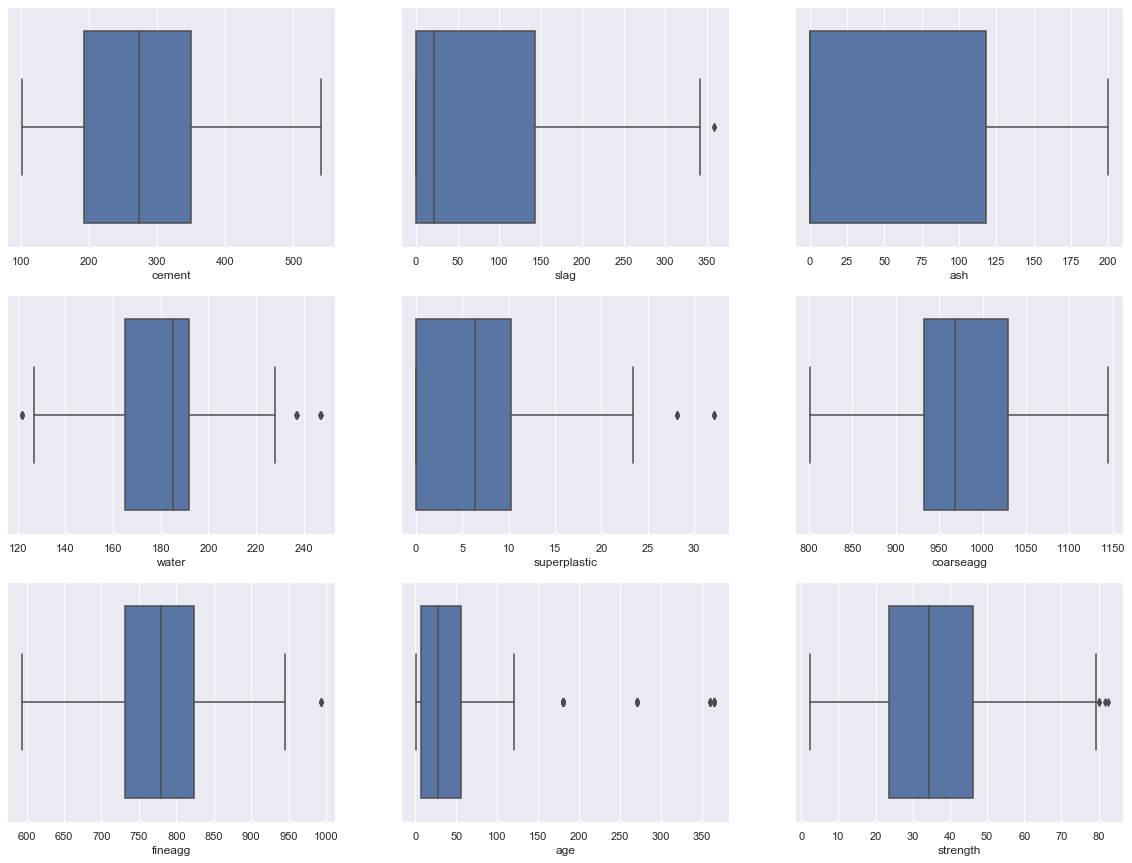

In [524]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
for i, column in enumerate(data.columns):
    sns.boxplot(data[column],ax=axes[i//3,i%3])

<h3><b>We clearly see that the attributes <i>Slag, Water, Superplastic, FineAgg, Age and Strength</i> has large number of attributes. Also their spread is more which can be seen from above distplot.<br /> <br /> So we need to treat the outliers, before further processing.  </b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.7 Treating Outliers in the Dataset :

<h3><b> We wil use IQR strategy to handle outliers out of other strategies. 
    
<br /><br />
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

</b></h3>

In [525]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [526]:
np.where((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

(array([  44,   51,   64,   66,   93,   99,  103,  129,  133,  144,  149,
         152,  156,  157,  159,  192,  198,  199,  207,  232,  256,  262,
         263,  270,  292,  297,  302,  312,  313,  323,  359,  361,  370,
         393,  432,  447,  448,  462,  465,  484,  504,  538,  539,  570,
         581,  584,  587,  594,  601,  620,  622,  623,  632,  642,  696,
         713,  720,  721,  732,  740,  744,  754,  755,  776,  789,  816,
         826,  838,  850,  857,  861,  878,  900,  901,  914,  918,  919,
         950,  951,  955,  957,  971,  985,  990,  995, 1003, 1017, 1026,
        1028]),
 array([4, 7, 7, 3, 7, 7, 7, 6, 7, 7, 7, 7, 4, 7, 7, 8, 7, 7, 7, 4, 7, 7,
        3, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 6, 7, 3, 7, 7, 6, 4, 7, 7,
        7, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 3, 4, 7, 7, 7, 3, 4,
        3, 4, 7, 6, 7, 7, 7, 7, 3, 1, 7, 8, 7, 4, 7, 7, 7, 1, 7, 8, 7, 4,
        7]))

<h3><b>After detecting outliers, we can treat it by keeping only valid values. We replace them with whiskers.  </b></h3>

In [527]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
data_out.shape

(941, 9)

In [528]:
concrete_data = data.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(concrete_data < Q1 - 1.5 * IQR)[0], np.where(concrete_data < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_data.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(concrete_data > Q3 + 1.5 * IQR)[0], np.where(concrete_data > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_data.iloc[i,j] = whisker[j]

In [529]:
# concrete_data is the data set after outlier treatment

concrete_data.shape

(1030, 9)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.7 Identify Correlation in the Data:

<h3><b>Its very essential to understand the correlation in the data attributes, since they largely influence the outcome of the model. Also, multicollinearity in the model can lead to sub optimal models. </b> </h3>

In [530]:
concrete_data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275239,-0.397467,-0.081617,0.079619,-0.109349,-0.225311,0.054325,0.498008
slag,-0.275239,1.000000,-0.323590,0.107031,0.043724,-0.284023,-0.283263,-0.052703,0.134621
ash,-0.397467,-0.323590,1.000000,-0.258379,0.395319,-0.009961,0.080962,-0.092704,-0.105577
water,-0.081617,0.107031,-0.258379,1.000000,-0.665260,-0.180249,-0.448979,0.189637,-0.290969
superplastic,0.079619,0.043724,0.395319,-0.665260,1.000000,-0.261624,0.216947,-0.122913,0.366235
coarseagg,-0.109349,-0.284023,-0.009961,-0.180249,-0.261624,1.000000,-0.176542,0.012295,-0.165250
fineagg,-0.225311,-0.283263,0.080962,-0.448979,0.216947,-0.176542,1.000000,-0.096565,-0.169601
age,0.054325,-0.052703,-0.092704,0.189637,-0.122913,0.012295,-0.096565,1.000000,0.469807
strength,0.498008,0.134621,-0.105577,-0.290969,0.366235,-0.165250,-0.169601,0.469807,1.000000


<h3><b>After seeing above correlation matrix, let's also visualize it.</h3></b>

In [531]:
def plot_corr(data, size=18):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

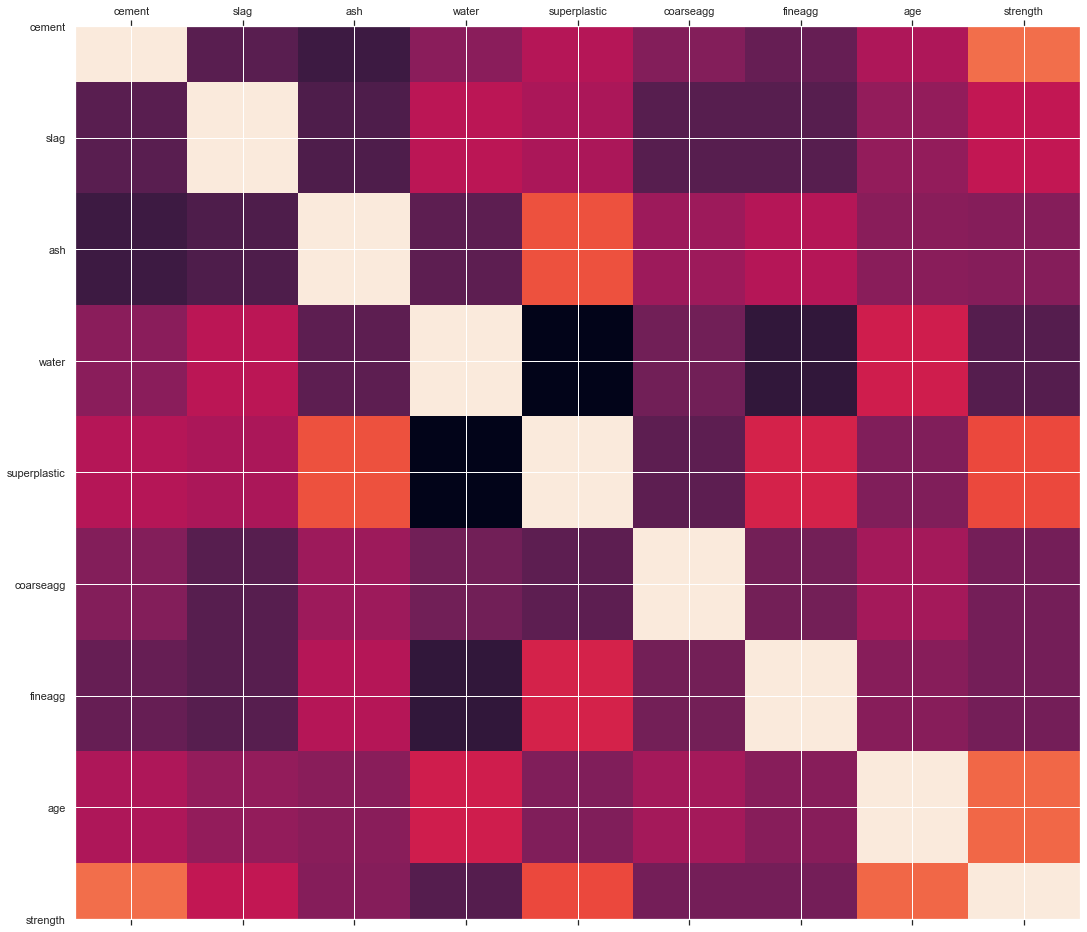

In [532]:
plot_corr(concrete_data)

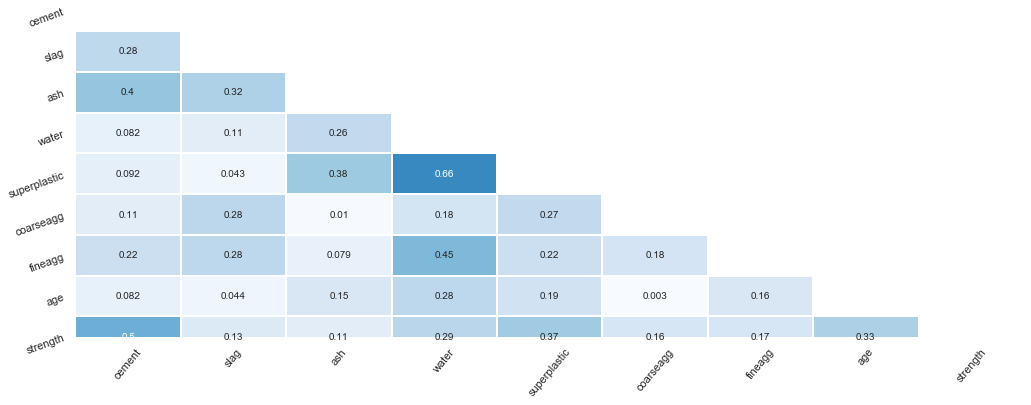

In [533]:
#Additional plot to depict correlation

corr = abs(data.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (17,6))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, 
            yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

<h3><b><font color="blue"><u>Notable Inferences : </u></font>

    

We infer that, w.r.t our target variable i.e strength, we do not any see notable correlations (ones below -0.5 and ones above +0.5). Only with cement it has fairly reasonable and positive correlation.

</b></h3>

# Bivarite Distribution of the attibutes :

A bivariate analysis among the different variables can be done using scatter matrix plot.

In [534]:
#sns.pairplot(concrete_data, diag_kind='kde')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><u>Notable Observation:</u></span>

<h3> We see that our target variable strength is co-related with cement, but on the other hand features like fineagg, coarseagg shows quite low co-relation or seem quite unrealted or uninfluential to our target variable.

</h3>

In [535]:
#We will use composite feature of watercement as ratio of water and cement, 
# since both of these attributes are closely to strength of the cement.


#data_out['water_cement'] = data_out['water'] / data_out['cement']
#sns.pairplot(data_out, diag_kind='kde') 

<h3>We see that even after adding composite feature, it is not helping much. So we will not add any composite feature as of now.
    
</h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Applying Algorithms :

In [596]:
data_copy = concrete_data

Y = data_copy['strength']
X = data_copy.drop(labels='strength',axis=1) 

concrete_data.describe()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.891893,54.188350,181.543252,6.159029,972.918932,773.439587,38.070388,35.812670
std,104.506364,86.266363,63.997004,21.225052,5.802457,77.753954,79.815303,35.782271,16.691447
min,102.000000,0.000000,0.000000,124.250000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,357.375000,200.100000,232.650000,25.500000,1145.000000,963.575000,129.500000,79.772500


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Splitting the data into training and test datasets in the ratio of 70:30 respectively :

In [597]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14.0
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91.0
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3.0
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7.0
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28.0


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Analysis using Linear Regression Model :

<h3><b>Since, in this case, we need to predict strength, which is our target variable and also since its continuous varibale, we need to go with <i><u>Linear Regression Model, SVM</u></i> to predict the same. Complexity of the model will be liner.</b></h3>

<h3>Analysis by Liner Regression : </h3>
    

In [598]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

#for idx, col_name in enumerate(x_train.columns):
 #   print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [599]:
#Train data

regression_model.score(x_train, y_train)

0.7254766837389761

In [600]:
#Test Data

regression_model.score(x_test, y_test)

0.7320709753755357

<h3><b>
Model Accuracy on Training Data = 0.72 <br>
Model Accuracy on Test Data = 0.73
</b></h3>


<h3> Create a regularized RIDGE model and note the coefficients¶: </h3>

In [601]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.12270499  0.10402876  0.08448708 -0.13951458  0.31714021  0.01654271
  0.02476072  0.25400439]


<h3> Create a regularized RIDGE model and note the coefficients¶: </h3>

In [602]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.12256582  0.1038401   0.08440447 -0.14127096  0.30993367  0.01617329
  0.02449025  0.25392664]


<h3>Let's compare scores :  </h3>

In [604]:
#Linear Regression

print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.7254766837389761
0.7320709753755357


In [592]:
#Ridge Score

print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.7254766837343036
0.7320711146236835


In [593]:
#Lasso Score

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.7254742682095282
0.7322131322744451


<h3> We see more or less same results. </h3>

<h3>Analysis by SVM :</h3>

In [541]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(x_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [542]:
y_pred = clr.predict(x_test)

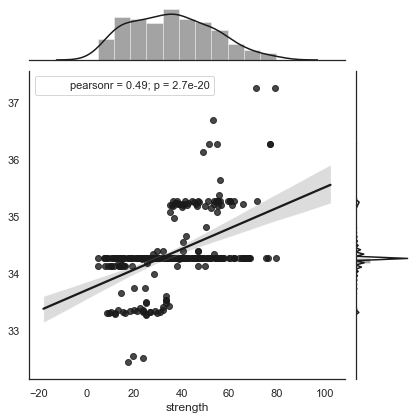

In [543]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k", stat_func=stats.pearsonr);

In [544]:
clr.score(x_test, y_test)

0.0260168276287398

<h3>The low score is due to the large spread and apparent mix of gaussians. 

<br /><br >

Let us explore the data for hidden clusters <h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9 Explore for Gaussians :

In [545]:
# We will use K Means Clustering

from sklearn.cluster import KMeans

cluster_range = range( 2, 6 )   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.866253e+07
1,3,2.218391e+07
2,4,1.934120e+07
3,5,1.724526e+07


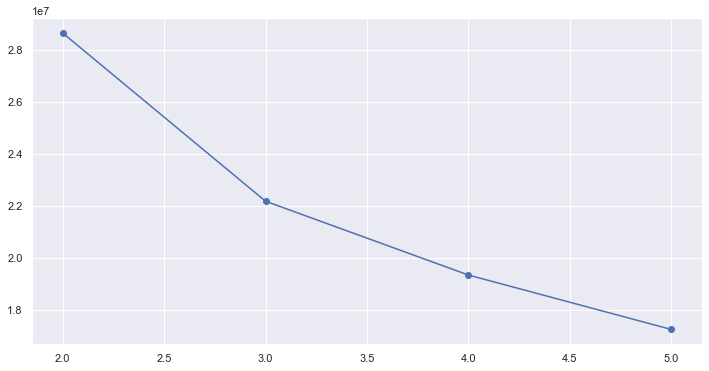

In [546]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [547]:
# The elbow plot confirms our visual analysis that there are likely 3 good clusters
# Let us start with 3 clusters


from sklearn.cluster import KMeans
from scipy.stats import zscore

#mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']

new_data = concrete_data.loc[: 'strength'] 
new_data_z = new_data.apply(zscore)


cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(new_data_z)

prediction=cluster.predict(new_data_z)
new_data_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

new_data_Z_copy = new_data_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly


In [548]:
centroids = cluster.cluster_centers_
#centroids
new_data_z.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1030.000000
mean,-3.858833e-16,3.915961e-16,3.634633e-16,4.909773e-16,-1.237414e-16,7.116206e-16,1.200334e-15,-2.931851e-16,-1.744020e-16,0.951456
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,0.885897
min,-1.715253e+00,-8.569712e-01,-8.471439e-01,-2.700633e+00,-1.061968e+00,-2.212138e+00,-2.249277e+00,-1.036502e+00,-2.006952e+00,0.000000
25%,-8.500535e-01,-8.569712e-01,-8.471439e-01,-7.845134e-01,-1.061968e+00,-5.265174e-01,-5.326075e-01,-8.687398e-01,-7.254344e-01,0.000000
50%,-7.915193e-02,-6.018232e-01,-8.471439e-01,1.629408e-01,4.154929e-02,-6.329352e-02,7.596735e-02,-2.815719e-01,-8.197817e-02,1.000000
75%,6.589606e-01,8.009107e-01,1.002278e+00,4.929000e-01,6.967624e-01,7.267605e-01,6.337754e-01,5.013187e-01,6.187208e-01,2.000000
max,2.477915e+00,3.287734e+00,2.281084e+00,2.409020e+00,3.334858e+00,2.214224e+00,2.383350e+00,2.556406e+00,2.634953e+00,2.000000


In [549]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_data) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.062121,0.119923,-0.795950,0.701520,-0.909352,0.246719,-0.265309,0.143653,-0.359272
1,0.958448,0.487205,-0.405972,-0.864325,1.026564,-0.661010,0.111548,-0.137576,1.121405
2,-0.625186,-0.417769,1.135717,-0.293426,0.434677,0.103508,0.235637,-0.082906,-0.242690


centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr) )
centroid_df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c399a0090>,
      dtype=object)

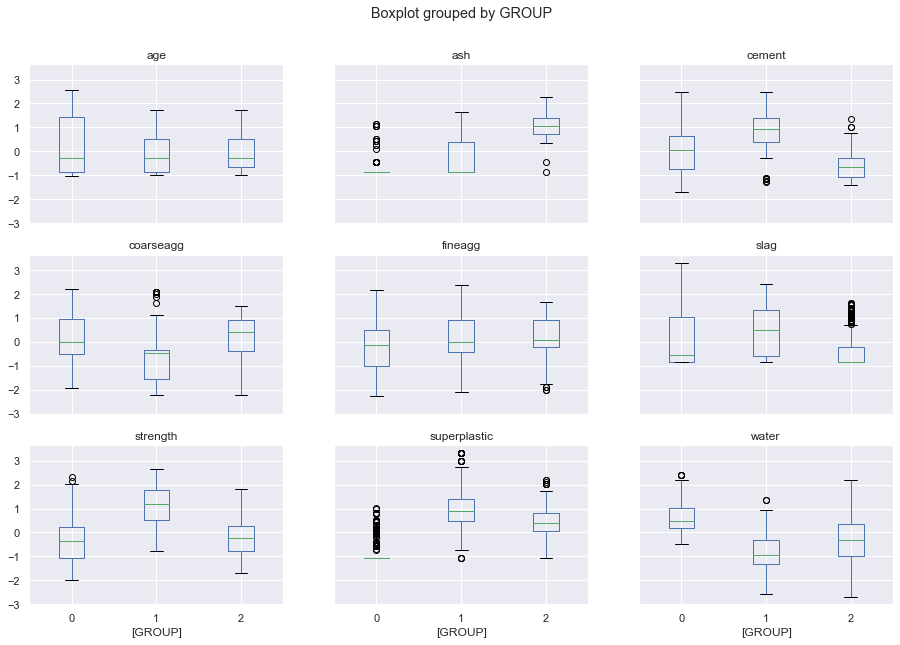

In [550]:
import matplotlib.pylab as plt

new_data_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

<h3>
There are many outliers on each dimension  (indicated by the black circles). Spread of data on each dimension (indicated by the whiskers is long, due to the outliers)

<br /><br />
If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)

</h3>

<h3> Identifying and Treating Outliers : 

In [551]:
# Addressing outliers at group level

temp_data = new_data_z   

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std #Subtract median from every member of each group absolute values > 2 SD
    group[outliers] = group.median()       
    return group

data_corrected = (temp_data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(new_data_z['GROUP']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c37f06c50>,
      dtype=object)

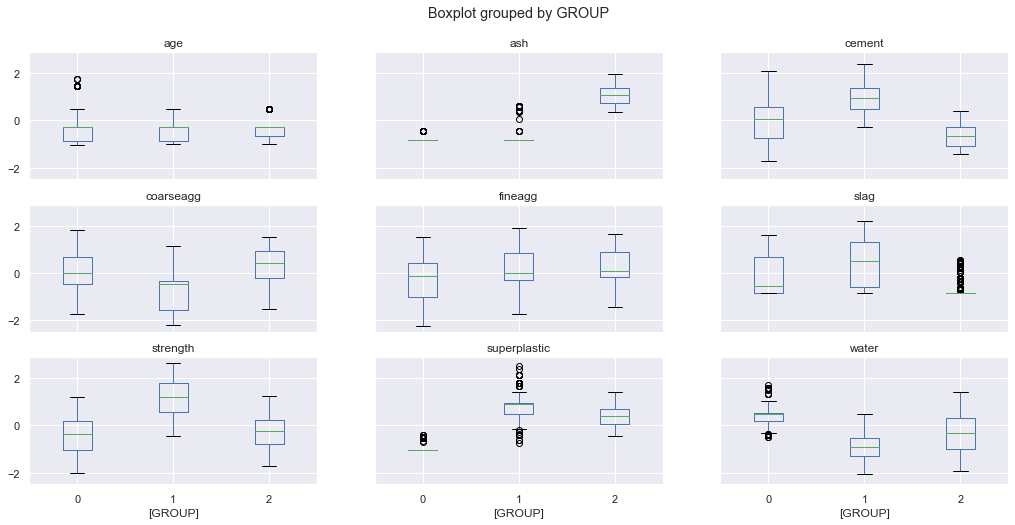

In [552]:
concat_data.boxplot(by = 'GROUP', layout=(3,3), figsize=(17, 8))

<h3> Analysing target variable with other attributes : 

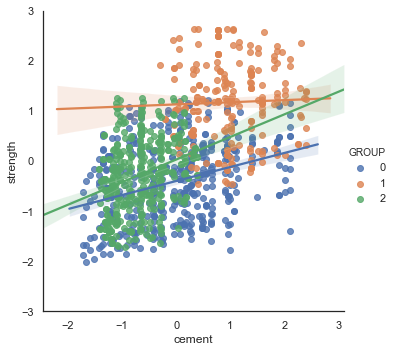

In [553]:
# Let us analyze the strength column vs other columns group wise.


var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

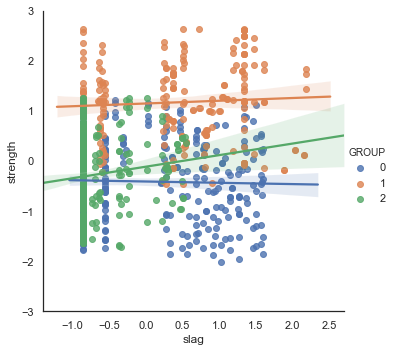

In [554]:
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

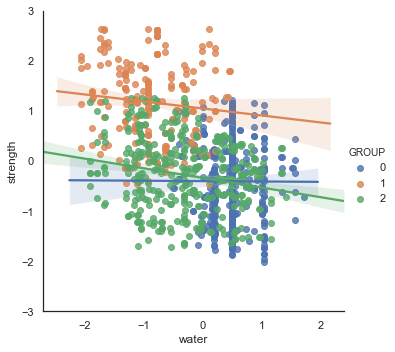

In [555]:
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

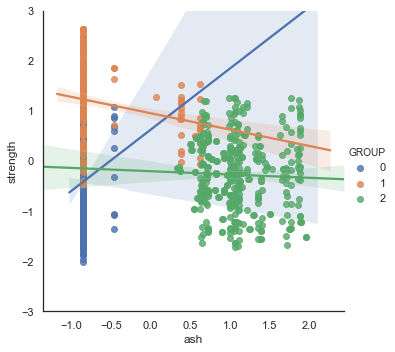

In [556]:
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

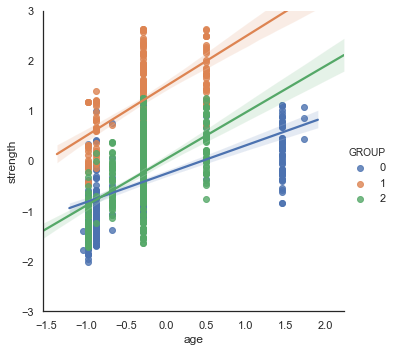

In [557]:
var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

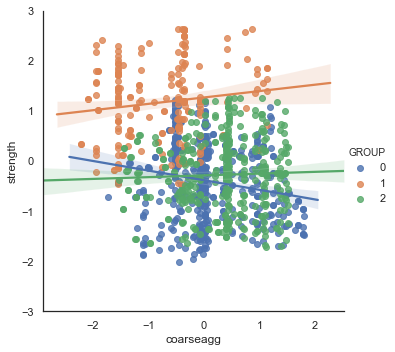

In [558]:
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

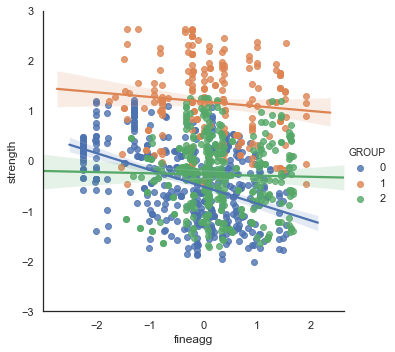

In [559]:
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

<h3><b>We don't see any distinguishable clusters. Now lets break the clusters into separate datasets and analyze individually.</b></h3>

In [560]:
g1 = concat_data[concat_data['GROUP']==0]
g2 = concat_data[concat_data['GROUP']==1]
g3 = concat_data[concat_data['GROUP']==2]
g3.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0
mean,-0.673093,-0.703513,1.097096,-0.322781,0.406341,0.317173,0.293922,-0.337198,-0.275620,2.0
std,0.472940,0.348206,0.390486,0.749448,0.418729,0.737055,0.709209,0.415931,0.717684,0.0
min,-1.428050,-0.856971,0.334735,-1.920516,-0.441239,-1.530169,-1.448290,-0.980581,-1.707851,2.0
25%,-1.092980,-0.856971,0.724005,-0.983667,0.058792,-0.206121,-0.186014,-0.673017,-0.773536,2.0
50%,-0.656431,-0.856971,1.059340,-0.317857,0.395020,0.397357,0.091009,-0.281572,-0.243966,2.0
75%,-0.298384,-0.856971,1.357155,0.327920,0.696762,0.909477,0.900144,-0.281572,0.232407,2.0
max,0.392819,0.546343,1.951221,1.412072,1.403703,1.506521,1.660393,0.501319,1.260978,2.0


In [561]:
temp = g3

Y = g3['strength']
X = g3.drop(labels='strength',axis=1) 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

#Liner Regression

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

#SVM
from sklearn import svm
clr = svm.SVR()  


clr.fit(x_train , y_train)
y_pred = clr.predict(x_test)

In [562]:
#Train data

regression_model.score(x_train, y_train)

0.45897346455995924

In [563]:
#Test data

regression_model.score(x_test, y_test)

0.48936643993457607

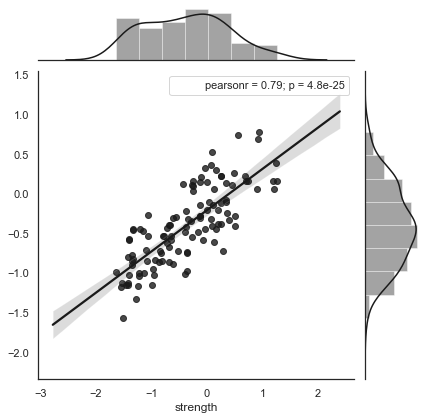

In [564]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k", stat_func=stats.pearsonr);

In [565]:
clr.score(x_test,y_test)

0.6001948150924614

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.11 Analysis using PCA :

<b>
Since, K Means Clustering is not helping at all, we will try PCA.

PCA should be used when the relations are linear. Looking at the pairplot, "slag", "ash", "coarseagg", "fineagg" 
are likely to be ineffective. So let us remove them before doing the PCA.

</b>

In [566]:
temp = concrete_data

cols_to_drop = ["slag", "ash", "coarseagg" , "fineagg"]

attr = g1.drop(cols_to_drop , axis = 1)

strength = np.array(attr.pop('strength'))

In [567]:
from sklearn.decomposition import PCA

cov_matrix = np.cov(attr, rowvar=False)

np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from lowest to highest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()    # reverses the sorted pairs from increasing value of eigenvalue to lowest

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]


In [568]:
tot = sum(eigenvalues)

var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 4 entries as there are 4 eigen vectors)

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

cum_var_exp

array([0.54897635, 0.90847586, 0.99337813, 1.        , 1.        ])

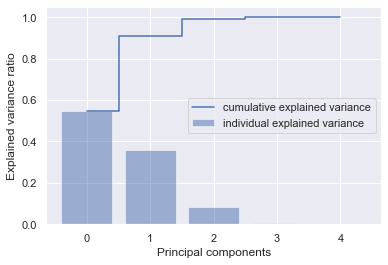

In [569]:
plt.bar(range(0, 5), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,5),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [570]:
# Transform the data into PC dimensions

strength = strength.reshape(len(strength), 1)

eigen_space = np.array(eigvectors_sort[0:2]).transpose()

proj_data_3D = np.dot(attr, eigen_space)

names = ['PC1', 'pc2', 'strength']

mpg_pca_array = np.concatenate((proj_data_3D, strength), axis=1)

mpg_pca_df = pd.DataFrame(mpg_pca_array ,columns=names )


X = mpg_pca_array[:,0:1] # select only the PCAs
y = mpg_pca_array[:,1]   # select only the mpg column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [571]:
strength.shape

(430, 1)

In [572]:
#SVM

from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)


#Liner Regression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [573]:
y_pred = clr.predict(X_test)

In [574]:
clr.score(X_test, y_test)

-0.031397246936096135

In [575]:
#Train data

regression_model.score(X_train, y_train)

0.005034223600939414

In [576]:
#Train data

regression_model.score(X_test, y_test)

-0.02510138023813968

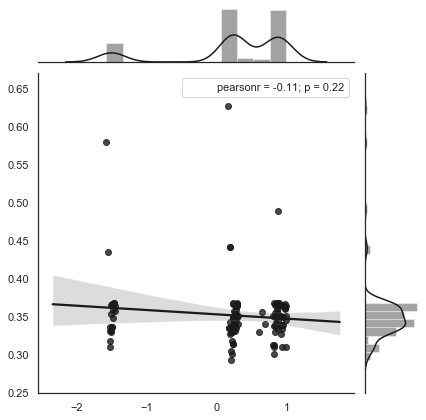

In [577]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k", stat_func=stats.pearsonr);

## Analysis using Decision Tree Regressor :

In [613]:
data_copy = concrete_data
data_copy = data_copy.apply(zscore)
Y = data_copy['strength']
X = data_copy.drop(labels='strength',axis=1)

from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(x_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = data_copy.columns[1:9]
print(feature_names)



Index(['slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age',
       'strength'],
      dtype='object')


In [614]:
k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

[0.46418391 0.         0.         0.08815475 0.         0.
 0.         0.44766134]
Index(['slag', 'strength', 'superplastic', 'age', 'fineagg', 'coarseagg',
       'water', 'ash'],
      dtype='object') [0.46418391 0.         0.         0.08815475 0.         0.
 0.         0.44766134]


In [615]:
y_pred = regressor.predict(x_test)

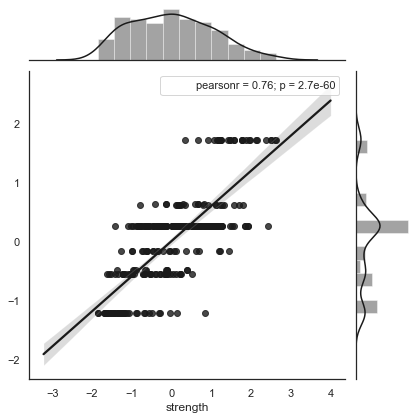

In [616]:
sns.set(style="darkgrid", color_codes=True)


with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k", stat_func=stats.pearsonr);

NameError: name 'plot_tree' is not defined

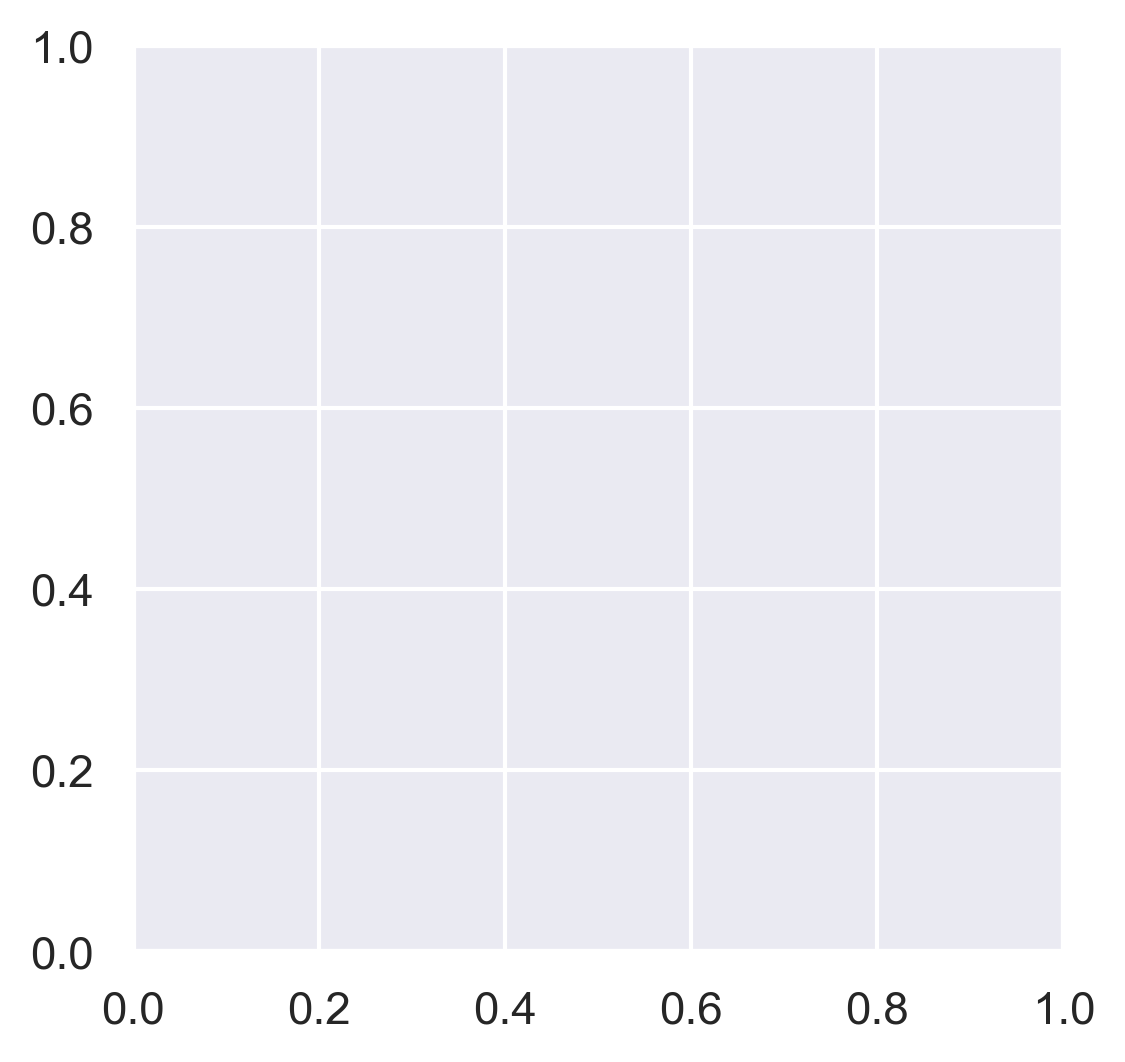

In [617]:
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [474]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.022250
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.122313
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.139001
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.179968
PPE               0.536468


0.7796610169491526


Text(0.5, 1, 'Confusion matrix')

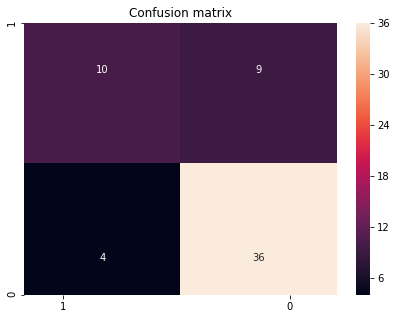

In [475]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

## Decision Tree using Entropy :

In [476]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [477]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [478]:
dt_model.score(test_set , test_labels)

1.0

In [479]:
dt_model.score(train_set, train_labels)   
#Overfit due to large complext tree. No training error , poor test performance

1.0

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.13 Ensemble Techniuques : Bagging <br>

In [480]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8305084745762712


Text(0.5, 1, 'Confusion matrix')

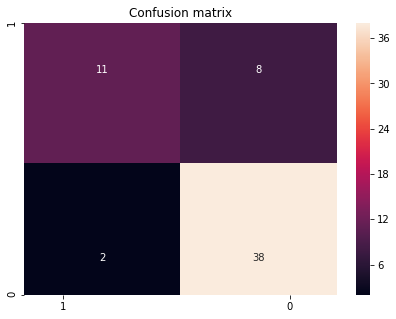

In [481]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.14 Ensemble Techniques : AdaBoosting <br>


In [482]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8305084745762712


Text(0.5, 1, 'Confusion matrix')

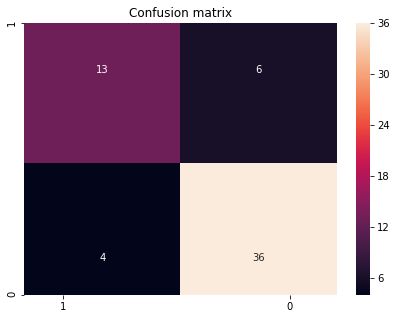

In [483]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.14 Ensemble Techniques : Gradient Boosting<br>


In [484]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8813559322033898


Text(0.5, 1, 'Confusion matrix')

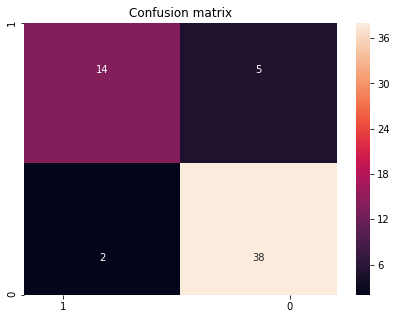

In [485]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.15 Ensemble Techniques : Random Forrest<br>


In [486]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.847457627118644


Text(0.5, 1, 'Confusion matrix')

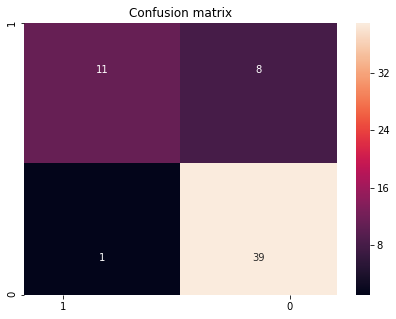

In [487]:
 y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

In [488]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=1)),
    ('svr', make_pipeline(GradientBoostingClassifier(random_state=1)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

ImportError: cannot import name 'StackingClassifier' from 'sklearn.ensemble' (/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/__init__.py)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10 Conclusion : <br>




After training and evaluating all three models, we see that <b>KNN (0.89)</b> has <b>highest model accuracy</b>.

Since, a lot of attributes are involved in training data, we also need to consider their co-efficients/weights and what impact they individually also impose on the outcome of the model to verify that model is <b>not biased.</b> <br>

We need to also ensure that the model outcome is not only driven by single attribute while other attributes don't having any impact, also we need to study correlation between attributes to analyse repercussions on the model due to multicollinearity. Also, regularisation of model is essential along with studying the error function of the model.

We will also consider the <b>ROC curve</b> is our case below since we have binary classification. ROC curves are typically used in binary classification to study the output of a classifier. <br>

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Area under curve for model Logistic Regression = 0.713158
Area under curve for model KNN = 0.803289
Area under curve for model Naive Bayes = 0.721053
Area under curve for model Random Forest = 0.817105
Area under curve for model Gradient Boost = 0.817105


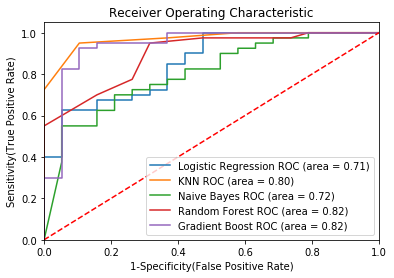

In [431]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
  {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'Gradient Boost',
    'model': GradientBoostingClassifier(),
}

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    print("Area under curve for model %s = %f" %(m['label'], auc))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Also, after applying various Ensemble Techniques like Bagging, Boosting, AdaBoosting, Gradient Boosting, Random Forrest, we see that Gradient Boosting increases the model accuracy.<br><br>

Owing to all above factors, we can clearly see that from ROC Curve, Type I, Type II errors and also from Model Accuracy that <b>KNN Model</b> performs the best amongst the other,and <b>Gradient Boosting</b> ensemble techniques increases model accuracy substantially making it a more sound choice in model selection.